In [1]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.2.2
asttokens                    3.0.0
astunparse                   1.6.3
blinker                      1.9.0
certifi                      2025.4.26
charset-normalizer           3.4.2
click                        8.2.1
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.2
cycler                       0.12.1
debugpy                      1.8.14
decorator                    5.2.1
executing                    2.2.0
filelock                     3.18.0
Flask                        3.1.1
flatbuffers                  25.2.10
fonttools                    4.58.0
fsspec                       2025.3.2
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.71.0
h5py                         3.13.0
idna                         3.10
ipykernel                    6.29.5
ipython                      9.2

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')


[]

In [5]:
import cv2
import imghdr

C:\Users\admin\AppData\Local\Temp\ipykernel_27440\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            if img is None:
                print('Unreadable image {}'.format(image_path))
                os.remove(image_path)
                continue
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

data = tf.keras.utils.image_dataset_from_directory('data', label_mode='int')
class_names = data.class_names  # This is a list of label names in order
print(class_names)

Found 2696 files belonging to 10 classes.
['avocado', 'banana', 'brocolli', 'carrot', 'chili', 'egg', 'fresh shrimp', 'ginger', 'grapes', 'steak']


In [8]:
import numpy as np
from matplotlib import pyplot as plt


In [9]:
data = tf.keras.utils.image_dataset_from_directory('data', label_mode='int')

Found 2696 files belonging to 10 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

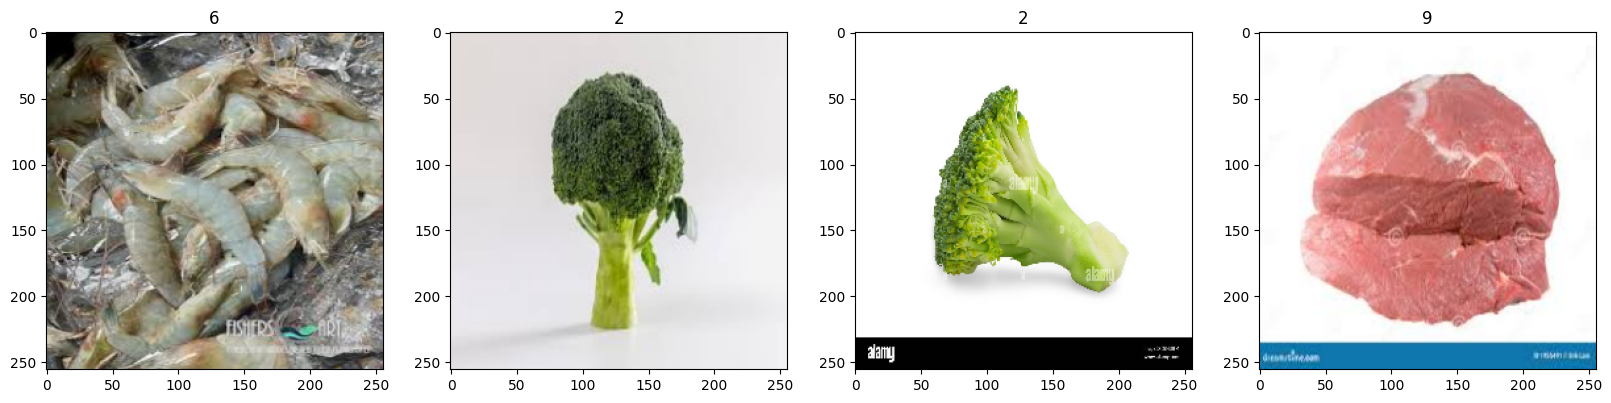

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

59

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
num_classes = 10  # or: num_classes = len(data.class_names)
model.add(Dense(num_classes, activation='softmax'))

d:\Study stuff\08.VGU\First year\AIot\Image classification\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,698,938 (14.11 MB)

 Trainable params: 3,698,938 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 14s 157ms/step - accuracy: 0.3960 - loss: 1.7639 - val_accuracy: 0.7390 - val_loss: 0.8043
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.8034 - loss: 0.6462 - val_accuracy: 0.8732 - val_loss: 0.4272
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.8808 - loss: 0.3768 - val_accuracy: 0.8640 - val_loss: 0.4095
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.9350 - loss: 0.2220 - val_accuracy: 0.8529 - val_loss: 0.5211
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.9381 - loss: 0.2126 - val_accuracy: 0.9320 - val_loss: 0.2524
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.9704 - loss: 0.0879 - val_accuracy: 0.9007 - val_loss: 0.3926
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.9743 - loss: 0.1027 - val_accuracy: 0.9154 - val_loss: 0.3126
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.9835 - loss: 0.0637 - val_accuracy: 

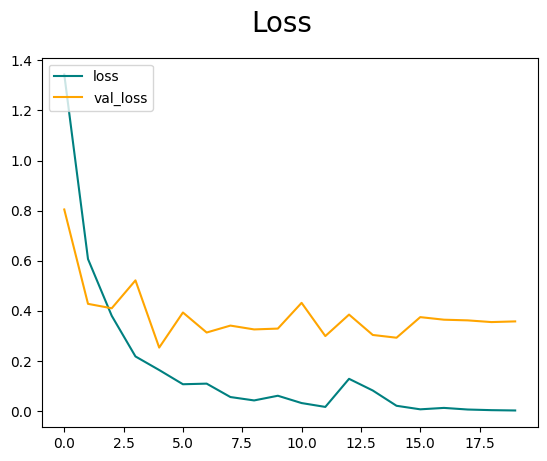

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

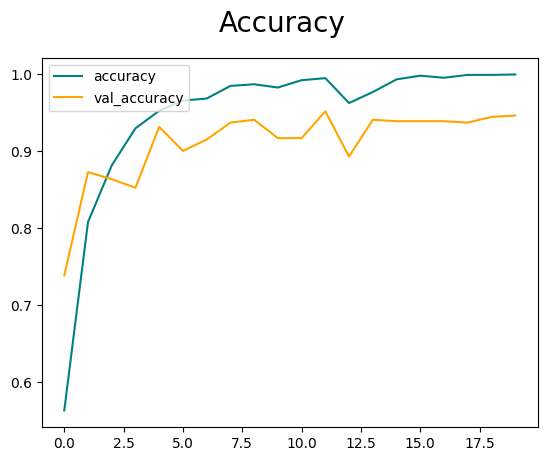

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    yhat_labels = np.argmax(yhat, axis=1)  # Convert probabilities to class labels
    pre.update_state(y, yhat_labels)
    re.update_state(y, yhat_labels)
    acc.update_state(y, yhat_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9906977, shape=(), dtype=float32) tf.Tensor(0.03515625, shape=(), dtype=float32)


In [33]:
import cv2

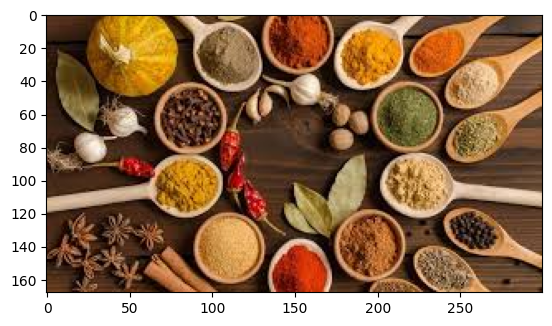

In [34]:
img = cv2.imread('corn.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
plt.imshow(img)
plt.show()

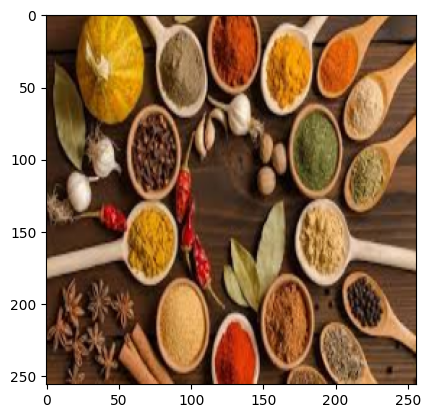

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


In [37]:
# Get probabilities and class names
probs = yhat[0]  
for idx, prob in enumerate(probs):
    print(f"{class_names[idx]}: {prob*100:.2f}%")
predicted_idx = np.argmax(probs)
print(f"\nPredicted class: {class_names[predicted_idx]} ({probs[predicted_idx]*100:.2f}%)")

avocado: 0.00%
banana: 0.00%
brocolli: 0.00%
carrot: 0.00%
chili: 0.00%
egg: 0.00%
fresh shrimp: 76.25%
ginger: 20.01%
grapes: 3.74%
steak: 0.00%

Predicted class: fresh shrimp (76.25%)


In [38]:
from tensorflow.keras.models import load_model
model.save('ingre_label.keras')
loaded_model = load_model('ingre_label.keras')

In [39]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    if img is None or img.size == 0:
        return None
    if img.shape[0] == 0 or img.shape[1] == 0:
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    resize = tf.image.resize(img, (256,256))
    yhat = loaded_model.predict(np.expand_dims(resize/255, 0))
    probs = yhat[0]
    predicted_idx = np.argmax(probs)
    return class_names[predicted_idx]

In [40]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import cv2
import numpy as np
import torch
import os

# Load image
img_path = 'corn.jpg'  # Change to your image file
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Load SAM model (download weights from https://github.com/facebookresearch/segment-anything)
sam_checkpoint = "sam_vit_b_01ec64.pth"  # Download and provide correct path
model_type = "vit_b"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

# Use the automatic mask generator
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(img_rgb)

output_dir = 'slices'
os.makedirs(output_dir, exist_ok=True)

# Save each mask as a slice
for i, mask_dict in enumerate(masks):
    mask = mask_dict['segmentation']
    ys, xs = np.where(mask)
    if len(xs) == 0 or len(ys) == 0:
        continue
    x1, x2 = xs.min(), xs.max()
    y1, y2 = ys.min(), ys.max()
    crop = img[y1:y2+1, x1:x2+1]
    crop_mask = mask[y1:y2+1, x1:x2+1]
    crop = cv2.bitwise_and(crop, crop, mask=crop_mask.astype(np.uint8)*255)
    out_path = os.path.join(output_dir, f'slice_{i+1}.jpg')
    cv2.imwrite(out_path, crop)
    print(f"Saved: {out_path}")

print("Done slicing segmented objects.")

Saved: slices\slice_1.jpg
Saved: slices\slice_2.jpg
Saved: slices\slice_3.jpg
Saved: slices\slice_4.jpg
Saved: slices\slice_5.jpg
Saved: slices\slice_6.jpg
Saved: slices\slice_7.jpg
Saved: slices\slice_8.jpg
Saved: slices\slice_9.jpg
Saved: slices\slice_10.jpg
Saved: slices\slice_11.jpg
Saved: slices\slice_12.jpg
Saved: slices\slice_13.jpg
Saved: slices\slice_14.jpg
Saved: slices\slice_15.jpg
Saved: slices\slice_16.jpg
Saved: slices\slice_17.jpg
Saved: slices\slice_18.jpg
Saved: slices\slice_19.jpg
Saved: slices\slice_20.jpg
Saved: slices\slice_21.jpg
Saved: slices\slice_22.jpg
Saved: slices\slice_23.jpg
Saved: slices\slice_24.jpg
Saved: slices\slice_25.jpg
Saved: slices\slice_26.jpg
Saved: slices\slice_27.jpg
Saved: slices\slice_28.jpg
Saved: slices\slice_29.jpg
Saved: slices\slice_30.jpg
Saved: slices\slice_31.jpg
Saved: slices\slice_32.jpg
Saved: slices\slice_33.jpg
Saved: slices\slice_34.jpg
Saved: slices\slice_35.jpg
Saved: slices\slice_36.jpg
Saved: slices\slice_37.jpg
Saved: sli

In [41]:
output_dir = 'slices'
slice_files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

predicted_classes = set()

for slice_path in slice_files:
    result = predict_image(slice_path)
    if result is not None:
        predicted_classes.add(result)

print("Stuff founded in the picture:")
for cls in predicted_classes:
    print(cls)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━